In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data() #gets dataset


170498071/170498071 [==============================] - 6s 0us/step


Image label is:  [6]
Image class is:  frog


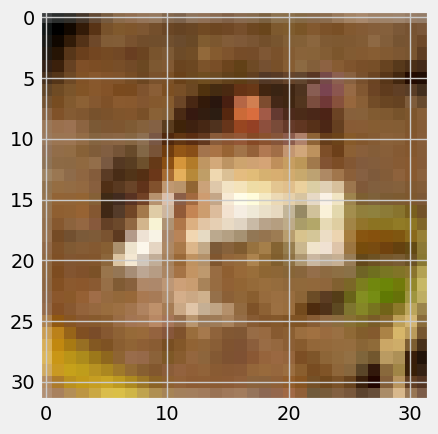

In [ ]:
index = 0
img = plt.imshow(x_train[index])
print ('Image label is: ', y_train[index]) #prints image and class
classification = ['airplane','car','bird','cat', 'deer','dog','frog', 'horse','ship','truck']
print('Image class is: ', classification[y_train[index][0]])

In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)
print('one hot label is: ',)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
one hot label is: 


In [ ]:
#normalise pixels to 0 and 1 values
x_train = x_train/255
x_test = x_test/255


In [ ]:
#create model
model = Sequential()
#first convolution layer
model.add(Conv2D(32, (5,5),activation = 'relu', input_shape = (32,32,3)))
#pooling layer
model.add(MaxPooling2D(pool_size =(2,2)))
#second convolution
model.add(Conv2D(32,(5,5), activation = 'relu'))
#pooling layer
model.add(MaxPooling2D(pool_size =(2,2)))
#flattening layer
model.add(Flatten())
#layer with 100 neurons
model.add(Dense(1000, activation = 'relu'))
#dropout layer with 50% dropout
model.add(Dropout(0.5))
#500 neurons
model.add(Dense(500, activation ='relu'))
#dropout layer
model.add(Dropout(0.5))
#250 neurons
model.add(Dense(250, activation ='relu'))
#10 neurons (10 categories)
model.add(Dense(10, activation='softmax'))




In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/10
  6/157 [>.............................] - ETA: 1:01 - loss: 2.3054 - accuracy: 0.0964

In [ ]:
model.evaluate(x_test,y_test_one_hot)[1]

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy Visualidatrion')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
new_image = plt.imread('unnamed.jpeg')
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array([resized_image]))
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range (10):
  for j in range (10):
    if x [0][list_index[i]]> x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j]=temp

print(list_index)

for i in range(5):
  print(classification[list_index[i]],':', round(predictions[0][list_index[i]]*100,2))